In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
test=pd.read_csv('../input/titanic/test.csv')
train=pd.read_csv('../input/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.drop(columns=['Cabin'],inplace=True) #Dropping the Cabin column as most of them are Nan 
test.drop(columns=['Cabin'],inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].fillna('S', inplace=True) #Filling the Nan values of the embarked column with S as it is the most probable one

In [13]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
test['Embarked'].fillna('S', inplace=True)

In [15]:
test[test['Fare'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [16]:
test['Fare'].fillna(test[test['Pclass']==3]['Fare'].mean(), inplace=True)

In [17]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [18]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), 177) #calculating the probable age 

In [19]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), 86)

In [20]:
train['Age'][train['Age'].isnull()]=train_age

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
test['Age'][test['Age'].isnull()]=test_age

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
#EDA

In [25]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [26]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

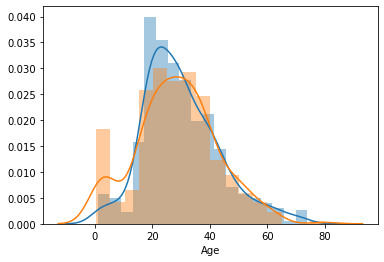

In [28]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

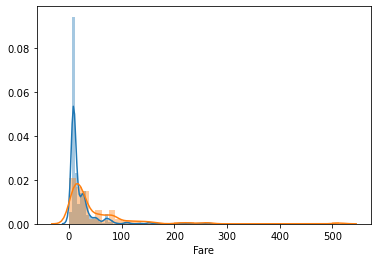

In [29]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [30]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [31]:
train['Family']=train['SibSp']+train['Parch']+1

In [32]:
test['Family']=test['SibSp']+test['Parch']+1

In [33]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [34]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [35]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [36]:
train['Family_size']=train['Family'].apply(cal)
test['Family_size']=test['Family'].apply(cal)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [38]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [39]:
train['Initials']=0
for i in train:
    train['Initials']=train.Name.str.extract('([A-Za-z]+)\.')

In [40]:
train['Initials']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initials, Length: 891, dtype: object

In [41]:
train.drop(columns=['Name'],inplace=True)

In [42]:
test['Initials']=0
for i in train:
    test['Initials']=test.Name.str.extract('([A-Za-z]+)\.')

In [43]:
train['Initials'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Jonkheer      1
Mme           1
Ms            1
Don           1
Lady          1
Countess      1
Sir           1
Name: Initials, dtype: int64

In [44]:
test['Initials'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Initials, dtype: int64

In [45]:
train['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Master'],['Other','Other','Miss','Other','Other','Mrs','Mrs','Other','Other','Other','Mr','Mr','Other','Mr'],inplace=True)
test['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Master','Dona'],['Other','Other','Miss','Other','Other','Mrs','Mrs','Other','Other','Other','Mr','Mr','Other','Mr','Other'],inplace=True)


In [46]:
train['Initials'].value_counts()

Mr       559
Miss     183
Mrs      127
Other     22
Name: Initials, dtype: int64

In [47]:
test.drop(columns=['Name'],inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Initials
0,1,0,3,male,22.0,7.2500,S,Medium,Mr
1,2,1,1,female,38.0,71.2833,C,Medium,Mrs
2,3,1,3,female,26.0,7.9250,S,Alone,Miss
3,4,1,1,female,35.0,53.1000,S,Medium,Mrs
4,5,0,3,male,35.0,8.0500,S,Alone,Mr


In [49]:
train.groupby(['Initials'])['Survived'].mean()


Initials
Miss     0.699454
Mr       0.187835
Mrs      0.795276
Other    0.363636
Name: Survived, dtype: float64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Family_size  891 non-null    object 
 8   Initials     891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [51]:
PassengerId=test['PassengerId'].values

In [52]:
train.drop(columns=['PassengerId','Fare'],inplace=True)
test.drop(columns=['PassengerId','Fare'],inplace=True)

In [53]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [54]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_size','Initials'])

In [55]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size','Initials'])

In [56]:
train.head()

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size_Alone,Family_size_Large,Family_size_Medium,Initials_Miss,Initials_Mr,Initials_Mrs,Initials_Other
0,0,22.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,1,38.0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,1,26.0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0
3,1,35.0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,35.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 418 non-null    float64
 1   Pclass_1            418 non-null    uint8  
 2   Pclass_2            418 non-null    uint8  
 3   Pclass_3            418 non-null    uint8  
 4   Sex_female          418 non-null    uint8  
 5   Sex_male            418 non-null    uint8  
 6   Embarked_C          418 non-null    uint8  
 7   Embarked_Q          418 non-null    uint8  
 8   Embarked_S          418 non-null    uint8  
 9   Family_size_Alone   418 non-null    uint8  
 10  Family_size_Large   418 non-null    uint8  
 11  Family_size_Medium  418 non-null    uint8  
 12  Initials_Miss       418 non-null    uint8  
 13  Initials_Mr         418 non-null    uint8  
 14  Initials_Mrs        418 non-null    uint8  
 15  Initials_Other      418 non-null    uint8  
dtypes: float

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Pclass_1            891 non-null    uint8  
 3   Pclass_2            891 non-null    uint8  
 4   Pclass_3            891 non-null    uint8  
 5   Sex_female          891 non-null    uint8  
 6   Sex_male            891 non-null    uint8  
 7   Embarked_C          891 non-null    uint8  
 8   Embarked_Q          891 non-null    uint8  
 9   Embarked_S          891 non-null    uint8  
 10  Family_size_Alone   891 non-null    uint8  
 11  Family_size_Large   891 non-null    uint8  
 12  Family_size_Medium  891 non-null    uint8  
 13  Initials_Miss       891 non-null    uint8  
 14  Initials_Mr         891 non-null    uint8  
 15  Initials_Mrs        891 non-null    uint8  
 16  Initials

In [59]:
print(train.shape)
print(test.shape)

(891, 17)
(418, 16)


In [60]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

In [63]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_pred=clf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.770949720670391

In [66]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None],
    "splitter" : ["best", "random"],
    "max_leaf_nodes": [1,2,3,4,5,6,7, None]
}

In [67]:
from sklearn.model_selection import GridSearchCV #using GridSearchCV for better accuracy
grid=GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [69]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
grid.best_score_

0.8371870109546166

In [71]:
X_final=test.iloc[:,:].values

In [72]:
y_final=grid.predict(X_final)

In [73]:
y_final.shape

(418,)

In [74]:
PassengerId.shape

(418,)

In [75]:
final=pd.DataFrame()

In [76]:
final

""


In [77]:
final['PassengerId']=PassengerId
final['Survived']=y_final

In [78]:
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
final.to_csv('submission_final.csv',index=False)